In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from neupy.algorithms.rbfn.pnn import PNN
from neupy.algorithms.rbfn.grnn import GRNN

In [2]:
def generate_points(a: float, b: float, x0: float, y0: float):
    t = np.arange(0, 2*np.pi, 0.025)
    points = np.zeros((t.shape[0], 2))
    points[:, 0] = a * np.cos(t) + x0
    points[:, 1] = b * np.sin(t) + y0
    return points

In [3]:
def classify_square3(model_func, a1=-1.2, b1=1.2, a2=-1.2, b2=1.2, step=0.025):
    X_paint = np.array([[a1, a2]]).reshape((1, 2))
    for i in np.arange(a1, b1, step):
        for j in np.arange(a2, b2, step):
            X_paint = np.append(X_paint, np.array([[i, j]]), axis=0)
    Y_paint = model_func(X_paint)
    x1 = X_paint[(Y_paint == 0)]
    x2 = X_paint[(Y_paint == 1)]
    x3 = X_paint[(Y_paint == 2)]
    plt.figure(figsize=(8, 6))
    plt.scatter(x1.T[0], x1.T[1], marker='s', color='#03c2fc')
    plt.scatter(x2.T[0], x2.T[1], marker='s', color='#fcb103')
    plt.scatter(x3.T[0], x3.T[1], marker='s', color='#03fc6f')
    plt.title("Классификация заданной области на 3 класса")

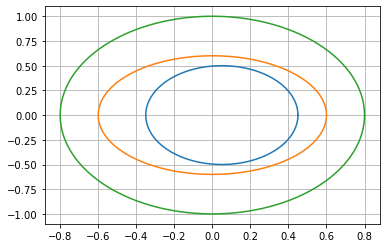

In [4]:
points1 = generate_points(0.4, 0.5, 0.05, 0)
points2 = generate_points(0.6, 0.6, 0, 0)
points3 = generate_points(0.8, 1, 0, 0)
plt.plot(points1[:, 0], points1[:, 1])
plt.plot(points2[:, 0], points2[:, 1])
plt.plot(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

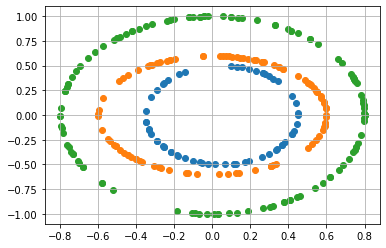

In [5]:
points1 = points1[np.random.choice(points1.shape[0], 60),:]
points2 = points2[np.random.choice(points2.shape[0], 100),:]
points3 = points3[np.random.choice(points3.shape[0], 120),:]

plt.scatter(points1[:, 0], points1[:, 1])
plt.scatter(points2[:, 0], points2[:, 1])
plt.scatter(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

In [6]:
features = np.concatenate((points1, points2, points3))
labels = np.concatenate((np.full(60, 0), np.full(100, 1), np.full(120, 2)))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=23)
print(x_train.shape[0] / 280, x_test.shape[0] / 280)

0.8 0.2


In [8]:
pnn = PNN(std=0.1)
pnn.fit(x_train, y_train)

PNN(batch_size=128, verbose=False, step=0.1, show_epoch=1, shuffle_data=False, epoch_end_signal=None, train_end_signal=None, std=0.1)

In [9]:
accuracy_score(pnn.predict(x_train), y_train)

0.9955357142857143

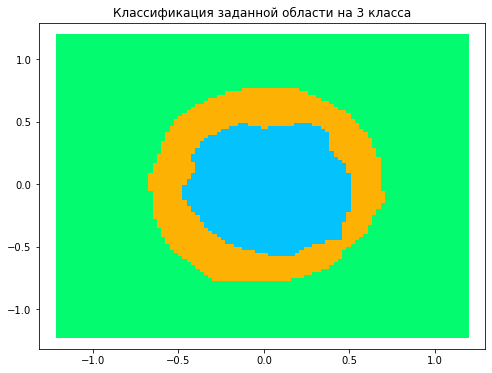

In [10]:
classify_square3(pnn.predict)

In [11]:
pnn = PNN(std=0.3)
pnn.fit(x_train, y_train)

PNN(batch_size=128, verbose=False, step=0.1, show_epoch=1, shuffle_data=False, epoch_end_signal=None, train_end_signal=None, std=0.3)

In [12]:
accuracy_score(pnn.predict(x_train), y_train)

0.8883928571428571

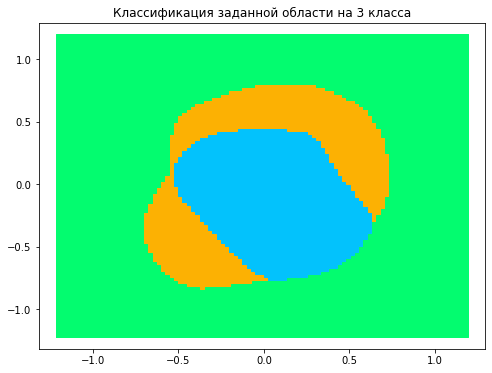

In [13]:
classify_square3(pnn.predict)

In [14]:
svc = SVC(kernel='rbf', C=1e2, gamma=0.3)
svc.fit(x_train, y_train)

SVC(C=100.0, gamma=0.3)

In [15]:
accuracy_score(svc.predict(x_train), y_train)

1.0

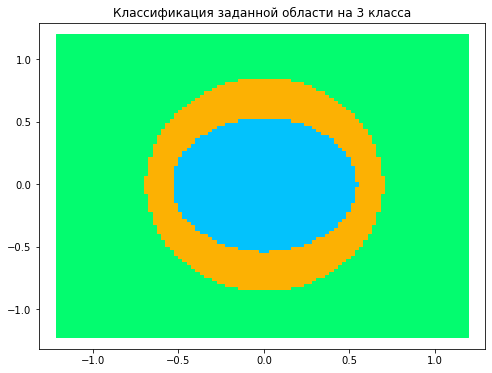

In [16]:
classify_square3(svc.predict)

In [17]:
svc = SVC(kernel='rbf', C=1e2, gamma=0.1)
svc.fit(x_train, y_train)

SVC(C=100.0, gamma=0.1)

In [18]:
accuracy_score(svc.predict(x_train), y_train)

1.0

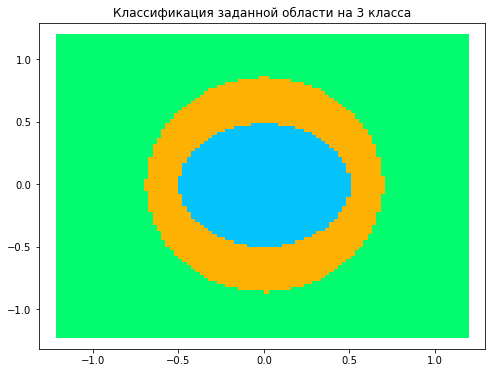

In [19]:
classify_square3(svc.predict)

200


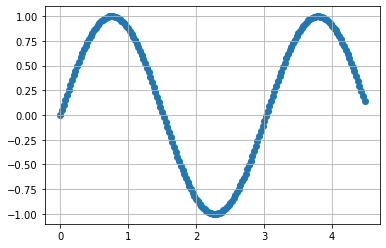

In [20]:
xt = lambda t: np.sin(0.66 * np.pi * t)
features = np.arange(0, 5, 0.025)
print(features.shape[0])
targets = xt(features)
n = int(0.9 * features.shape[0])
x_train, y_train = features[:n], targets[:n]
x_test, y_test = features[n:], targets[n:]
plt.scatter(x_train, y_train)
plt.grid(True)
plt.show()

In [21]:
grnn = GRNN(std=0.1)
grnn.fit(x_train, y_train)

GRNN(verbose=False, step=None, show_epoch=None, shuffle_data=None, epoch_end_signal=None, train_end_signal=None, std=0.1)

In [22]:
mean_squared_error(y_train, grnn.predict(x_train))

0.00025613594595168986

In [23]:
mean_squared_error(y_test, grnn.predict(x_test))

0.3542091104240255

In [24]:
train_predictions = grnn.predict(x_train)
test_predictions = grnn.predict(x_test)

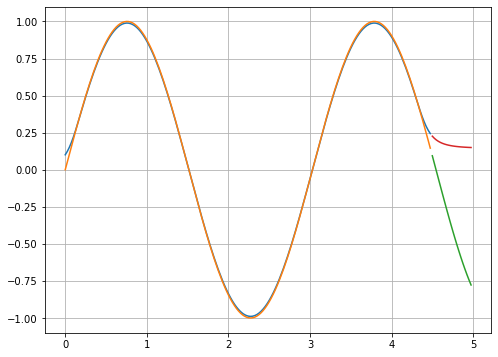

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(x_train, train_predictions)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, test_predictions)
plt.grid(True)
plt.show()